# Deep Learning: Artificial Neural Networks Part 1

In [ ]:
# import sklearn.linear_model.perceptron

from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
# Let's use sklearn to make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 20, n_features = 2, n_informative = 2, n_redundant =  0, weights=[.5, .5], random_state=2017)

# Create the model
clf = Perceptron(max_iter=100, verbose=0, random_state=2017, fit_intercept=True, eta0=0.002)
clf.fit(X,y)

Perceptron(eta0=0.002, max_iter=100, random_state=2017)

In [ ]:
X

array([[ 1.09588335,  0.81547288],
       [ 1.78186011,  0.89413765],
       [ 2.26371867, -0.2894777 ],
       [-0.32069248, -1.2580733 ],
       [-1.52801264, -0.57608713],
       [-0.92195874,  2.04110477],
       [-1.9626919 , -1.00695298],
       [ 2.0963732 , -0.44006988],
       [-1.09515676,  1.05832746],
       [ 1.25822878,  1.18696259],
       [ 1.62410233, -0.34480234],
       [-1.68326886,  0.26704294],
       [-0.30816799,  2.73868123],
       [ 1.25676053, -0.91038323],
       [-0.92354833,  1.04742663],
       [ 0.99830842, -1.09913567],
       [-2.3713745 , -0.65089128],
       [-1.79836762, -0.77748635],
       [ 0.60568389,  2.26931795],
       [ 1.28581821,  2.40355462]])

In [ ]:
sum(y == 1)

10

In [ ]:
clf.predict(X)

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
# Print the results
print ("Prediction: " + str(clf.predict(X)))
print ("Actual: " + str(y))
print ("Accuracy: " + str(clf.score(X, y)*100) + "%")

# Output the values
print ("X1 Coefficient: " + str(clf.coef_[0,0]))
print ("X2 Coefficient: " + str(clf.coef_[0,1]))
print ("Intercept: " + str(clf.intercept_))

Prediction: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Actual: [1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1]
Accuracy: 100.0%
X1 Coefficient: 0.0059220006267825375
X2 Coefficient: -0.0001843653761609775
Intercept: [0.]


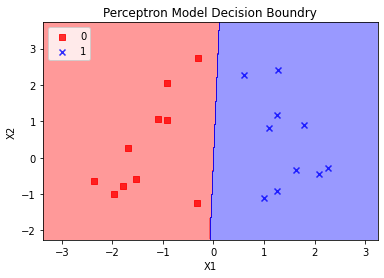

In [ ]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.title('Perceptron Model Decision Boundry')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.show()

In [ ]:
## 

## Multilayer Perceptrons (Feedforward Neural Network)

Let’s see the MLP algorithm in action from the Scikit-learn library on a classification
problem. We’ll be using the digits dataset available as part of the Scikit-learn dataset,
which is made up of 1,797 samples (a subset of the MNIST dataset)—

In [ ]:
#Load MNIST Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_digits
np.random.seed(seed=2017)
# load data
digits = load_digits()
print('We have %d samples'%len(digits.target))

We have 1797 samples


Text(0, 1, '9')

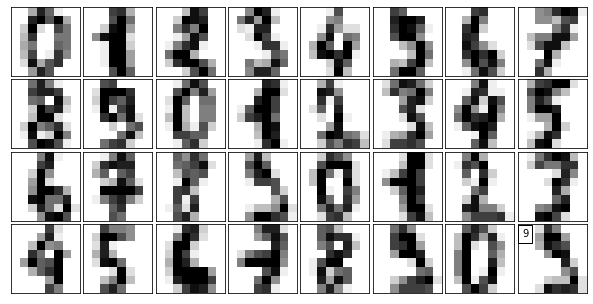

In [ ]:
## plot the first 32 samples to get a sense of the data
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)

for i in range(32):
 ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
 ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
 
ax.text(0, 1, str(digits.target[i]), bbox=dict(facecolor='white'))

In [ ]:
#Example Code for Sklearn MLPClassifier
# split data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.
target, test_size=0.2, random_state=2017)
print ('Number of samples in training set: %d' %(len(y_train)))
print ('Number of samples in test set: %d' %(len(y_test)))

Number of samples in training set: 1437
Number of samples in test set: 360


In [ ]:
# Standardise data, and fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [ ]:
# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize ANN classifier
mlp = MLPClassifier(hidden_layer_sizes=(100), activation='logistic',max_iter = 100)

In [ ]:
# Train the classifier with the training data
mlp.fit(X_train_scaled,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=100)

In [ ]:
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

Training set score: 0.990953
Test set score: 0.986111


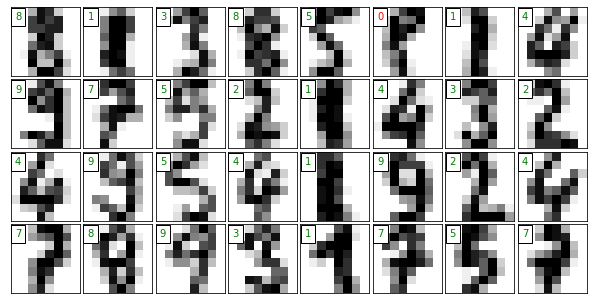

In [ ]:
# predict results from the test data
X_test_predicted = mlp.predict(X_test_scaled)
fig = plt.figure(figsize=(8, 8)) # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05,wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(32):
  ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.gray_r)
 # label the image with the target value
  if X_test_predicted[i] == y_test[i]:
   ax.text(0, 1, X_test_predicted[i], color='green',bbox=dict(facecolor='white'))
  else:
     ax.text(0, 1, X_test_predicted[i], color='red',bbox=dict(facecolor='white'))

### Restricted Boltzman Machines (RBMs)


In [ ]:
from scipy.ndimage import convolve

# Function to nudge the dataset
def nudge_dataset(X, Y):
  """
This produces a dataset 5 times bigger than the original one,
by moving the 8x8 images in X around by 1px to left, right, down, up
"""
direction_vectors = [
 [[0, 1, 0],
 [0, 0, 0],
 [0, 0, 0]],
 [[0, 0, 0],
 [1, 0, 0],
 [0, 0, 0]],
 [[0, 0, 0],
 [0, 0, 1],
 [0, 0, 0]],
 [[0, 0, 0],
 [0, 0, 0],
 [0, 1, 0]]]

# shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',weights=w).ravel()
# X = np.concatenate([X] +[np.apply_along_axis(shift, 1, X, vector)
# for vector in direction_vectors])
# Y = np.concatenate([Y for _ in range(5)], axis=0)
# return( X, Y)


shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',weights=w).ravel()
X = np.concatenate([X] +[np.apply_along_axis(shift, 1, X, vector)for vector in direction_vectors])
Y = np.concatenate([Y for _ in range(5)], axis=0)
return( X, Y)

ValueError: ignored

In [ ]:
#Example Code for Using BernoulliRBM with Classifier
# Example adapted from scikit-learn documentation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from scipy.ndimage import convolve

In [ ]:
# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
y = digits.target
X, y = nudge_dataset(X, digits.target)
# Scale the features such that the values are between 0-1 scale
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=2017)
print (X.shape)
print (y.shape)

TypeError: ignored

## MLP Using Keras

In [1]:
#Example Code for Keras MLP
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(2017)
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Activation, Dropout, Input
from keras.models import Model
from keras.utils import np_utils
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
#from keras.utils.visualize_util import model_to_dot, plot_model
from tensorflow.keras.utils import plot_model


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

nb_classes = 10 # class size
input_unit_size = 28*28 # flatten 28*28 images to a 784 vector for each image
X_train = X_train.reshape(X_train.shape[0], input_unit_size)
X_test = X_test.reshape(X_test.shape[0], input_unit_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Scale the values by dividing 255 i.e., means foreground (black)
X_train /= 255
X_test /= 255



11490434/11490434 [==============================] - 0s 0us/step


In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
28 * 28

784

In [5]:
X_train.shape

(60000, 784)

In [6]:
arr = np.array([   [[2,17] , [45, 78]],    [[88,92], [60,76]],     [[76, 33], [20,18]]  ])

In [7]:
arr.shape

(3, 2, 2)

In [8]:
# one-hot representation, required for multiclass problems
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
nb_classes = 10 # class size


X_train shape: (60000, 784)
60000 train samples
10000 test samples


In [9]:
y_train.shape

(60000, 10)

In [10]:
# flatten 28*28 images to a 784 vector for each image
input_unit_size = 28*28

# create model
model = Sequential()
model.add(Dense(input_unit_size, input_dim=input_unit_size, kernel_initializer='normal', activation='relu'))
model.add(Dense(nb_classes, kernel_initializer='normal',activation='softmax'))

### Compile the Model


In [11]:
# from keras.utils.visualize_util import plot
from IPython.display import SVG
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot, plot_model

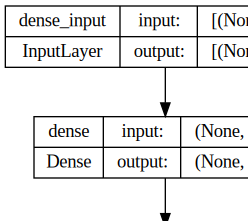

In [12]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Train Model and Evaluate


In [14]:
# model training
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=500, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/5
120/120 - 5s - loss: 0.3824 - accuracy: 0.8943 - val_loss: 0.1848 - val_accuracy: 0.9473 - 5s/epoch - 39ms/step
Epoch 2/5
120/120 - 3s - loss: 0.1568 - accuracy: 0.9558 - val_loss: 0.1282 - val_accuracy: 0.9620 - 3s/epoch - 28ms/step
Epoch 3/5
120/120 - 4s - loss: 0.1075 - accuracy: 0.9697 - val_loss: 0.1031 - val_accuracy: 0.9706 - 4s/epoch - 37ms/step
Epoch 4/5
120/120 - 3s - loss: 0.0806 - accuracy: 0.9777 - val_loss: 0.0821 - val_accuracy: 0.9734 - 3s/epoch - 28ms/step
Epoch 5/5
120/120 - 3s - loss: 0.0612 - accuracy: 0.9826 - val_loss: 0.0782 - val_accuracy: 0.9759 - 3s/epoch - 27ms/step
Error: 2.41%


In [15]:
scores

[0.07815958559513092, 0.9758999943733215]

### Additional Example to Train Model and Evaluate for Diabetes Dataset

In [18]:
import pandas as pd
# load pima indians dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of Diabetes.csv')
# split into input (X) and output (y) variables
X = dataset.iloc[:,0:8].values
y = dataset['class'].values # dependent variables


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

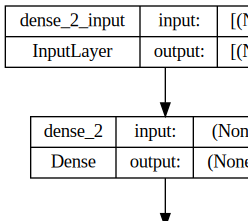

In [20]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [21]:
# Fit the model
model.fit(X, y, epochs=5, batch_size=10)
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/5
77/77 [==============================] - 1s 4ms/step - loss: 0.6687 - accuracy: 0.6380
Epoch 2/5
77/77 [==============================] - 0s 3ms/step - loss: 0.6398 - accuracy: 0.6510
Epoch 3/5
77/77 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.6510
Epoch 4/5
77/77 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.6745
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.6113 - accuracy: 0.6849
accuracy: 68.49%
